In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/data.csv


drive/MyDrive/data.csv


In [ ]:
ls drive/MyDrive/Data_to_Transform.csv

drive/MyDrive/Data_to_Transform.csv


In [ ]:
ls drive/MyDrive/'Encoding Data.csv'

'drive/MyDrive/Encoding Data.csv'


In [ ]:
df=pd.read_csv('drive/MyDrive/Encoding Data.csv')
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


ORDINAL ENCODER


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
pm=['Hot','Warm','Cold']
e1=OrdinalEncoder(categories=[pm])
e1.fit_transform(df[["ord_2"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.]])

In [ ]:
df['bo2']=e1.fit_transform(df[["ord_2"]])
df

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,Hot,0.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,2.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,2.0
5,5,T,N,Green,Hot,0.0
6,6,F,N,Red,Cold,2.0
7,7,T,N,Red,Cold,2.0
8,8,F,N,Blue,Warm,1.0
9,9,F,Y,Red,Hot,0.0


LABEL ENCODER


In [ ]:
le=LabelEncoder()
dfc=df.copy()
dfc['ord_2']=le.fit_transform(df[["ord_2"]])
dfc

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,1,0.0
1,1,F,Y,Blue,2,1.0
2,2,F,N,Blue,0,2.0
3,3,F,N,Green,2,1.0
4,4,T,N,Red,0,2.0
5,5,T,N,Green,1,0.0
6,6,F,N,Red,0,2.0
7,7,T,N,Red,0,2.0
8,8,F,N,Blue,2,1.0
9,9,F,Y,Red,1,0.0


ONEHOT ENCODER


In [ ]:

from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df2=df.copy()
enc=pd.DataFrame(ohe.fit_transform(df2[['nom_0']]))
df2=pd.concat([df2,enc],axis=1)
df2

,id,bin_1,bin_2,nom_0,ord_2,bo2,0
0,0,F,N,Red,Hot,0.0,"(0, 2)\t1.0"
1,1,F,Y,Blue,Warm,1.0,"(0, 0)\t1.0"
2,2,F,N,Blue,Cold,2.0,"(0, 0)\t1.0"
3,3,F,N,Green,Warm,1.0,"(0, 1)\t1.0"
4,4,T,N,Red,Cold,2.0,"(0, 2)\t1.0"
5,5,T,N,Green,Hot,0.0,"(0, 1)\t1.0"
6,6,F,N,Red,Cold,2.0,"(0, 2)\t1.0"
7,7,T,N,Red,Cold,2.0,"(0, 2)\t1.0"
8,8,F,N,Blue,Warm,1.0,"(0, 0)\t1.0"
9,9,F,Y,Red,Hot,0.0,"(0, 2)\t1.0"


In [ ]:
pd.get_dummies(df2,columns=["nom_0"])

,id,bin_1,bin_2,ord_2,bo2,0,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,F,N,Hot,0.0,"(0, 2)\t1.0",False,False,True
1,1,F,Y,Warm,1.0,"(0, 0)\t1.0",True,False,False
2,2,F,N,Cold,2.0,"(0, 0)\t1.0",True,False,False
3,3,F,N,Warm,1.0,"(0, 1)\t1.0",False,True,False
4,4,T,N,Cold,2.0,"(0, 2)\t1.0",False,False,True
5,5,T,N,Hot,0.0,"(0, 1)\t1.0",False,True,False
6,6,F,N,Cold,2.0,"(0, 2)\t1.0",False,False,True
7,7,T,N,Cold,2.0,"(0, 2)\t1.0",False,False,True
8,8,F,N,Warm,1.0,"(0, 0)\t1.0",True,False,False
9,9,F,Y,Hot,0.0,"(0, 2)\t1.0",False,False,True


BINARY ENCODER


In [ ]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
from category_encoders import BinaryEncoder
df=pd.read_csv('drive/MyDrive/data.csv')
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [ ]:
be=BinaryEncoder()
nd=be.fit_transform(df['Ord_2'])

In [ ]:
dfb=pd.concat([df,nd],axis=1)
dfb

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,Ord_2_0,Ord_2_1,Ord_2_2
0,0,F,N,Delhi,Hot,High School,0,0,0,1
1,1,F,Y,Bangalore,Warm,Masters,1,0,1,0
2,2,M,N,Mumbai,Very Hot,Diploma,1,0,1,1
3,3,M,Y,Chennai,Cold,Bachelors,0,1,0,0
4,4,M,Y,Delhi,Cold,Bachelors,1,1,0,0
5,5,F,N,Delhi,Very Hot,Masters,0,0,1,0
6,6,M,N,Chennai,Warm,PhD,1,1,0,1
7,7,F,N,Chennai,Hot,High School,1,0,0,1
8,8,M,N,Delhi,Very Hot,High School,0,0,0,1
9,9,F,Y,Delhi,Warm,PhD,0,1,0,1


TARGET ENCODER


In [ ]:
from category_encoders import TargetEncoder
te=TargetEncoder()
cc=df.copy()
new=te.fit_transform(X=cc["City"],y=cc["Target"])
cc=pd.concat([cc,new],axis=1)
cc

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,City
0,0,F,N,Delhi,Hot,High School,0,0.445272
1,1,F,Y,Bangalore,Warm,Masters,1,0.565054
2,2,M,N,Mumbai,Very Hot,Diploma,1,0.565054
3,3,M,Y,Chennai,Cold,Bachelors,0,0.525744
4,4,M,Y,Delhi,Cold,Bachelors,1,0.445272
5,5,F,N,Delhi,Very Hot,Masters,0,0.445272
6,6,M,N,Chennai,Warm,PhD,1,0.525744
7,7,F,N,Chennai,Hot,High School,1,0.525744
8,8,M,N,Delhi,Very Hot,High School,0,0.445272
9,9,F,Y,Delhi,Warm,PhD,0,0.445272


FEATURE TRANSFORMATION


In [ ]:
from scipy import stats

In [ ]:
df=pd.read_csv('drive/MyDrive/Data_to_Transform.csv')
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [ ]:
df.skew()

,0
Moderate Positive Skew,0.656308
Highly Positive Skew,1.271249
Moderate Negative Skew,-0.690244
Highly Negative Skew,-1.201891


In [ ]:
np.log(df["Highly Positive Skew"])

,Highly Positive Skew
0,1.063011
1,1.085995
2,1.087342
3,1.098720
4,1.102640
...,...
9995,2.790522
9996,2.797053
9997,2.839253
9998,2.869515


In [ ]:
np.reciprocal(df["Moderate Positive Skew"])

,Moderate Positive Skew
0,1.111123
1,0.898026
2,0.864431
3,0.791057
4,0.755336
...,...
9995,0.067801
9996,0.067320
9997,0.065522
9998,0.065488


In [ ]:
np.sqrt(df["Highly Positive Skew"])

,Highly Positive Skew
0,1.701492
1,1.721158
2,1.722317
3,1.732144
4,1.735543
...,...
9995,4.036027
9996,4.049229
9997,4.135576
9998,4.198627


In [ ]:
np.square(df["Highly Positive Skew"])

,Highly Positive Skew
0,8.381452
1,8.775724
2,8.799396
3,9.001942
4,9.072800
...,...
9995,265.348230
9996,268.837091
9997,292.512290
9998,310.762852


In [ ]:
df["Highly Positive Skew_boxcox"],parameters=stats.boxcox(df["Highly Positive Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox
0,0.899990,2.895074,11.180748,9.027485,0.812909
1,1.113554,2.962385,10.842938,9.009762,0.825921
2,1.156830,2.966378,10.817934,9.006134,0.826679
3,1.264131,3.000324,10.764570,9.000125,0.833058
4,1.323914,3.012109,10.753117,8.981296,0.835247
...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357


In [ ]:
df["Moderate Negative Skew_yeojohnson"],parameters=stats.yeojohnson(df["Moderate Negative Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Moderate Negative Skew_yeojohnson
0,0.899990,2.895074,11.180748,9.027485,0.812909,29.137807
1,1.113554,2.962385,10.842938,9.009762,0.825921,27.885274
2,1.156830,2.966378,10.817934,9.006134,0.826679,27.793303
3,1.264131,3.000324,10.764570,9.000125,0.833058,27.597362
4,1.323914,3.012109,10.753117,8.981296,0.835247,27.555370
...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.949345
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-2.028952
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-2.199693
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-2.697151


In [ ]:
df.skew()

,0
Moderate Positive Skew,0.656308
Highly Positive Skew,1.271249
Moderate Negative Skew,-0.690244
Highly Negative Skew,-1.201891
Highly Positive Skew_boxcox,0.023089
Moderate Negative Skew_yeojohnson,-0.119651


In [ ]:
df["Highly Negative Skew_yeojohnson"],parameters=stats.yeojohnson(df["Highly Negative Skew"])

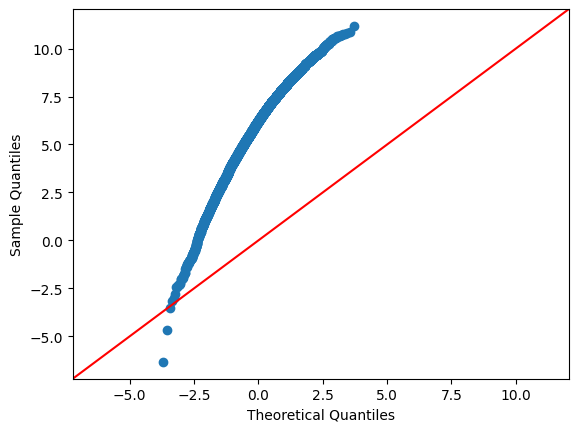

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df["Moderate Negative Skew"],line='45')
plt.show()

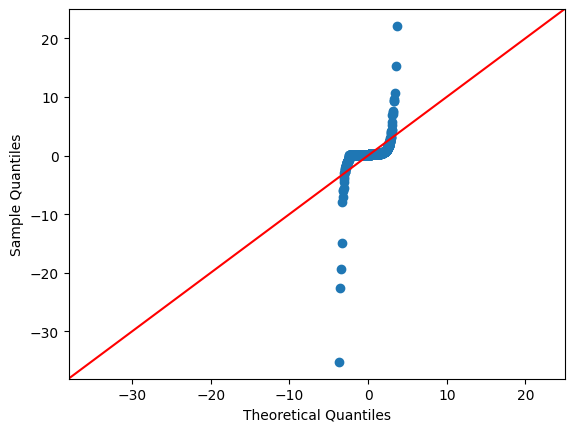

In [ ]:
sm.qqplot(np.reciprocal(df["Moderate Negative Skew"]),line='45')
plt.show()